In [18]:
import numpy as np
import cmath
from sympy import*
import matplotlib.pyplot as plt
import matplotlib
def print_function(f,var):
    n,d=fraction(f)
    n=Poly(n,var)
    n_coeff=n.all_coeffs()
    n_coeff=[round(elem,3) for elem in n_coeff]
    d=Poly(d,var)
    d_coeff=d.all_coeffs()
    d_coeff=[round(elem,3) for elem in d_coeff]
    degn=degree(n)
    degd=degree(d)
    n=0
    d=0
    for i in enumerate(n_coeff):
        n=n+var**(degn-i[0])*i[1]
    for i in enumerate(d_coeff):
        d=d+var**(degd-i[0])*i[1]
    p=n/d
    print(p)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


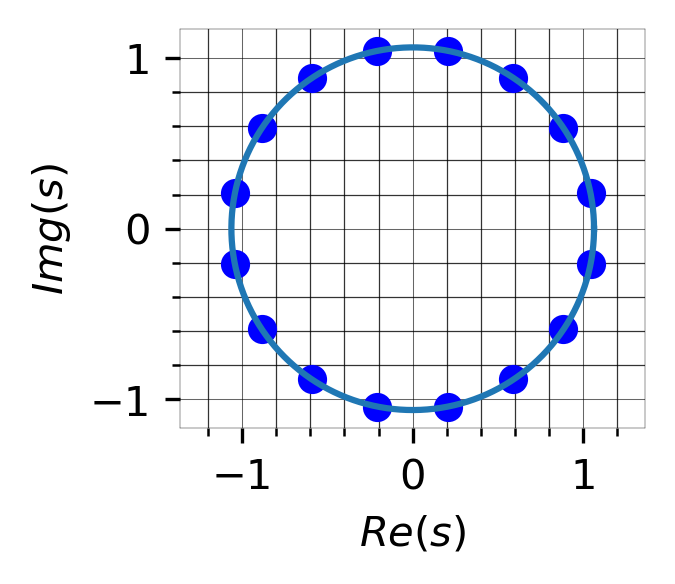

In [19]:
order=8
omega_c=1.063
omegap=1
theta=np.linspace(0,2*np.pi,1000)
x=np.zeros(2*order,dtype=np.complex)
for n in range(2*order):
    x[n]=complex(np.sin((2*n+1)*np.pi/2/order+np.pi/2)*omega_c,np.cos((2*n+1)*np.pi/2/order+np.pi/2)*omega_c)
x=x*omegap
%matplotlib inline
plt.figure(figsize=(2,3),dpi=300)
plt.plot(np.real(x),np.imag(x),'bo')
plt.axes().set_aspect('equal')
plt.xlim(-omega_c-0.3, omega_c+0.3)
plt.xlabel(r'$Re(s)$')
plt.ylabel(r'$Img(s)$')
plt.plot(omega_c*np.cos(theta),omega_c*np.sin(theta))
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
plt.savefig('roots_chebyschev.png',bbox_inches='tight')
plt.show()

1/(0.613386034527556*s**8 + 3.34219221109742*s**7 + 9.10539867811292*s**6 + 16.0956532684039*s**5 + 20.1188546002666*s**4 + 18.1875892280451*s**3 + 11.6260456566013*s**2 + 4.8220422346971*s + 1.0)
1/(0.613*s**8 + 3.342*s**7 + 9.105*s**6 + 16.096*s**5 + 20.119*s**4 + 18.188*s**3 + 11.626*s**2 + 4.822*s + 1.0)


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


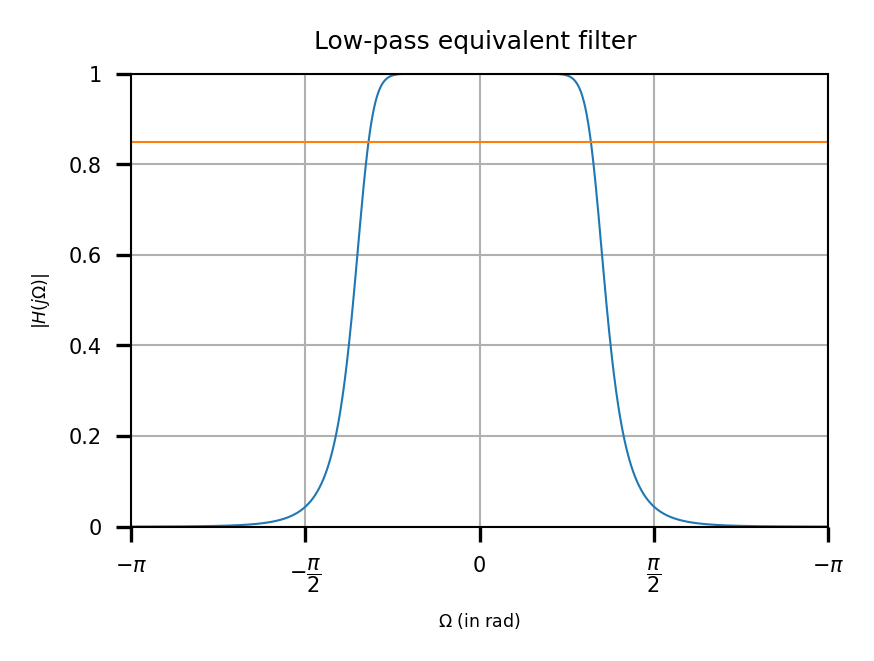

In [20]:
H,s,w,z=symbols('H,s,w,z')
D=Function('D')(s)
D=1
N=Function('N')(s)
N=1
for i in range(2*order):
    if(re(x[i])<0):
        D=D*(1-s/x[i])
N=N.real
D=Poly(D,s)
D=D.xreplace({I:0})
D=1/D
D=1/D
H=N/D
print(H)
print_function(H,s)
modH=Function('|H|')(w)
modH=abs(H.subs(s,I*w))

matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(-np.pi,np.pi,1000)
modH_lambdified=lambdify(w,modH)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(freq_axis,modH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(-np.pi, np.pi)
plt.xlabel(r'$\Omega$ (in rad)',fontsize='small')
plt.ylabel(r'$|H(j\Omega)|$',fontsize='small')
plt.xticks([-np.pi,-np.pi/2, 0, np.pi/2,np.pi], [r'$-\pi$',r'$-\dfrac{\pi}{2}$', 0, r'$\dfrac{\pi}{2}$',r'$-\pi$'])
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.axes().grid(linewidth=0.5)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Low-pass equivalent filter ')
plt.savefig('low_pass.png',bbox_inches='tight')
plt.show()

(0.734*s**2 + 1.0)**8
0.0842497225490893*s**16 + 0.918253106802064*s**14 + 4.37859110872918*s**12 + 11.9307659638397*s**10 + 20.31806192752*s**8 + 22.145026624*s**6 + 15.085168*s**4 + 5.872*s**2 + 1.0
(0.0842497225490893*s**16 + 0.918253106802064*s**14 + 4.37859110872918*s**12 + 11.9307659638397*s**10 + 20.31806192752*s**8 + 22.145026624*s**6 + 15.085168*s**4 + 5.872*s**2 + 1.0)/(0.0842497225490893*s**16 + 0.337601824538214*s**15 + 1.59466478201632*s**14 + 4.0989813445217*s**13 + 10.7161797093536*s**12 + 19.6867736071231*s**11 + 35.4211131040731*s**10 + 48.4756030340453*s**9 + 64.2304599799961*s**8 + 66.0430559046939*s**7 + 65.746113461517*s**6 + 49.7836078825973*s**5 + 36.9194947003644*s**4 + 19.2395824366117*s**3 + 10.197484256395*s**2 + 2.94125288147584*s + 1.0)
(0.084*s**16 + 0.918*s**14 + 4.379*s**12 + 11.931*s**10 + 20.318*s**8 + 22.145*s**6 + 15.085*s**4 + 5.872*s**2 + 1.0)/(0.084*s**16 + 0.338*s**15 + 1.595*s**14 + 4.099*s**13 + 10.716*s**12 + 19.687*s**11 + 35.421*s**10 + 48.4

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


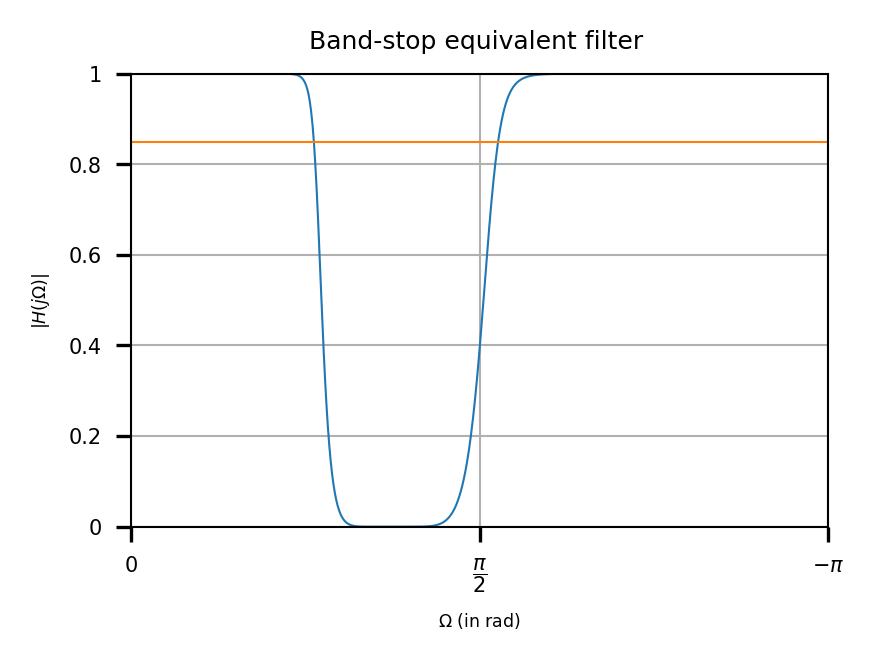

In [21]:
bsH=Function('bsH')(s)
a,b=symbols('a,b')
tx=Function('tx')(s)
tx=0.60996*s/(0.734*s**2+1)
bsHD=D.subs(s,tx)
n,d=fraction(factor(bsHD))
print(d)
d=expand(d)
bsHD=n/d
print(d)
bsH=N*d/n
print(bsH)
print_function(bsH,s)
modbsH=Function('|bsH|')(w)
modbsH=abs(bsH.subs(s,I*w))
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5

freq_axis=np.linspace(0,np.pi,1000)
modbsH_lambdified=lambdify(w,modbsH)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(freq_axis,modbsH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (in rad)',fontsize='small')
plt.ylabel(r'$|H(j\Omega)|$',fontsize='small')
plt.xticks([0, np.pi/2,np.pi], [0, r'$\dfrac{\pi}{2}$',r'$-\pi$'])
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.axes().grid(linewidth=0.5)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Band-stop equivalent filter ')
plt.savefig('band_stop_analog.png',bbox_inches='tight')
plt.show()

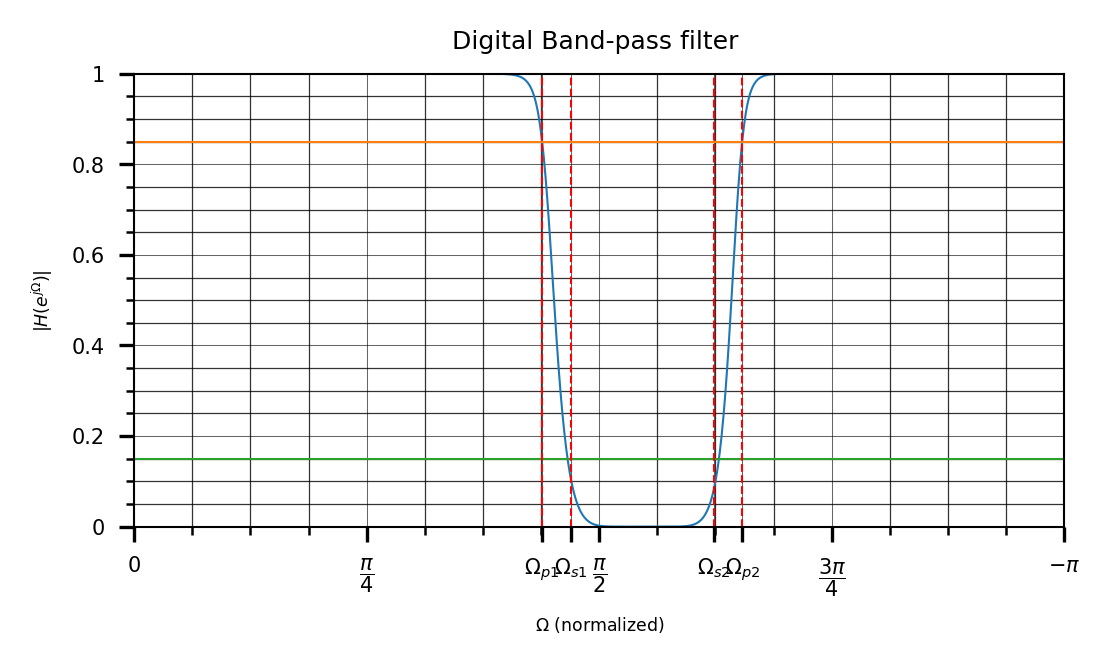

In [22]:
n,d=fraction(bsH)          #d is the denominator of bs function, n is the numerator of bs function
bilinear=Function('bilinear')(z)
bilinear=(z-1)/(z+1)
dz=d.subs(s,bilinear)
dz=factor(dz)
dzn,dzd=fraction(dz)
dzn=expand(dzn)
dzd=expand(dzd)
nz=n.subs(s,bilinear)
nz=factor(nz)
nzn,nzd=fraction(nz)
filter=nzn/dzn
filter_discrete=filter.subs(z,exp(I*z))
absf=abs(filter_discrete)
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absf)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,modH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,0.4385*np.pi,0.4692*np.pi,np.pi/2,0.6231*np.pi,0.6538*np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\Omega_{p1}$',r'$\Omega_{s1}$',r'$\dfrac{\pi}{2}$',r'$\Omega_{s2}$',r'$\Omega_{p2}$',r'$\dfrac{3\pi}{4}$',r'$-\pi$'])
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.plot(freq_axis,np.linspace(0.15,0.15,1000),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-Stop filter ')
plt.axvline(x=0.4385*np.pi,color='r',ls='--', lw=0.5)
plt.axvline(x=0.4692*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6231*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6538*np.pi,color='r',ls='--', lw=0.5)
plt.savefig('band-stop.png',bbox_inches='tight')
plt.show()

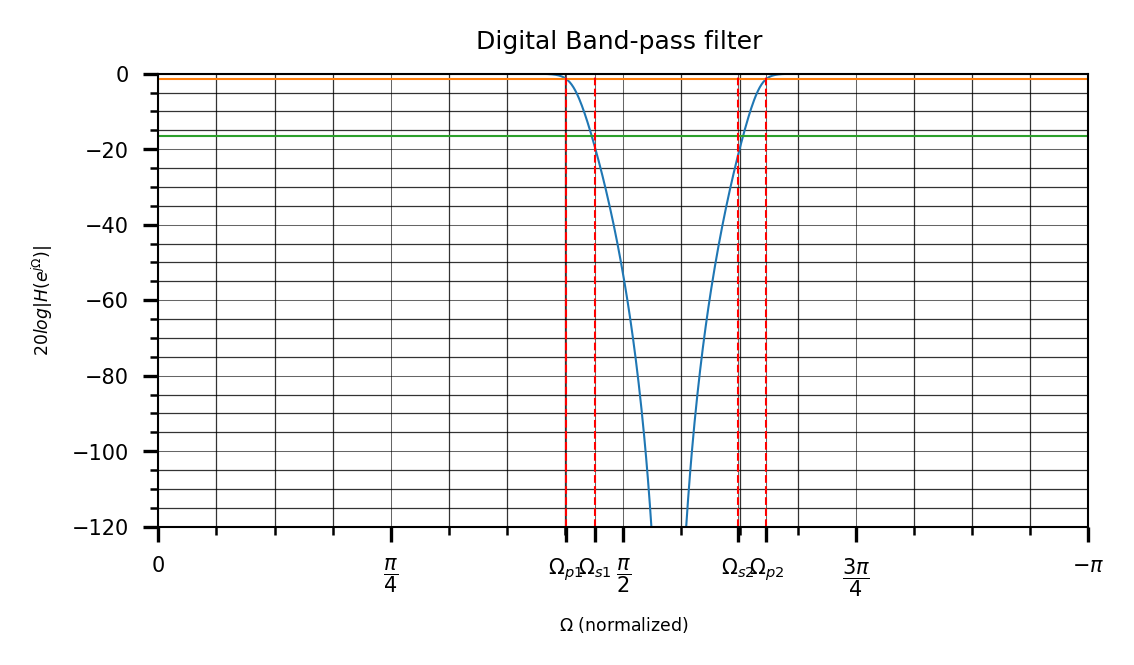

0.995966301047574
0.901600007504754
5.86957096590737e-10
7.12930122050200e-5


In [23]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absf)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,20*np.log10(modH_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$20log|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,0.4385*np.pi,0.4692*np.pi,np.pi/2,0.6231*np.pi,0.6538*np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\Omega_{p1}$',r'$\Omega_{s1}$',r'$\dfrac{\pi}{2}$',r'$\Omega_{s2}$',r'$\Omega_{p2}$',r'$\dfrac{3\pi}{4}$',r'$-\pi$'])
plt.ylim(-120,0)
plt.plot(freq_axis,20*np.log10(np.linspace(0.85,0.85,1000)),linewidth=0.5)
plt.plot(freq_axis,20*np.log10(np.linspace(0.15,0.15,1000)),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-Stop filter ')
plt.axvline(x=0.4385*np.pi,color='r',ls='--', lw=0.5)
plt.axvline(x=0.4692*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6231*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6538*np.pi,color='r',ls='--', lw=0.5)
plt.savefig('Band-Stop DB.png',bbox_inches='tight')
plt.show()
print(absf.evalf(subs={z:0.4109*np.pi}))
print(absf.evalf(subs={z:0.4353*np.pi}))
print(absf.evalf(subs={z:0.5564*np.pi}))
print(absf.evalf(subs={z:0.5806*np.pi}))

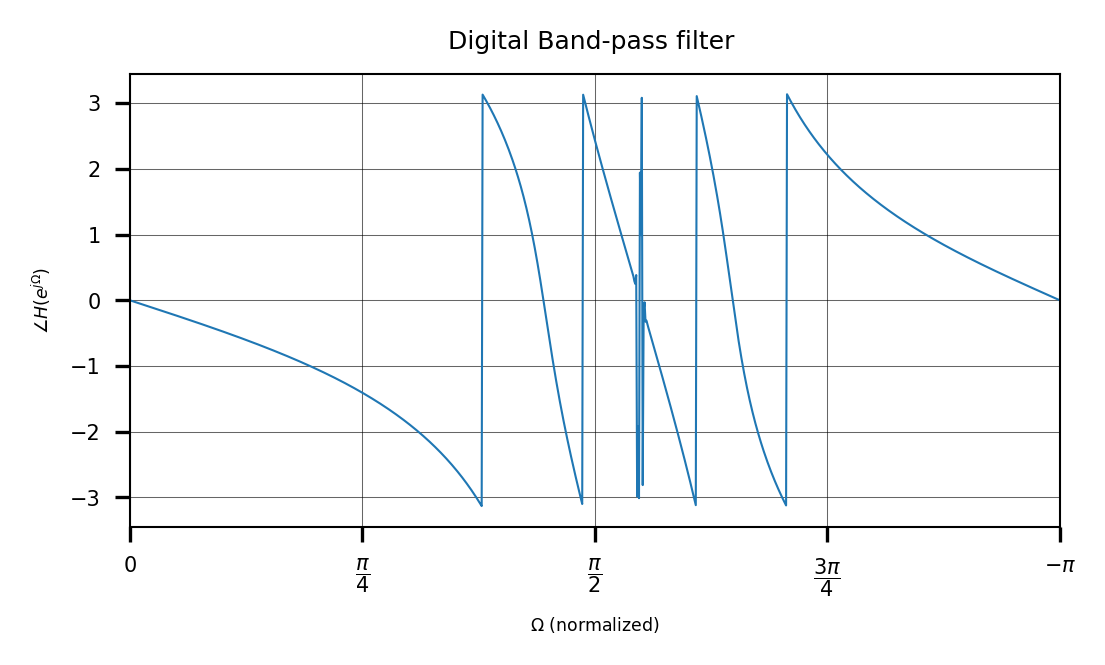

In [24]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
H_lambdified=lambdify(z,filter_discrete)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,np.angle(H_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$\angle H(e^{j\Omega})$',fontsize='small')
plt.xticks([0, np.pi/4,np.pi/2,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{3\pi}{4}$',r'$-\pi$'])
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-stop filter ')
plt.savefig('Band-stop angle.png',bbox_inches='tight')
plt.show()